In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# Financial Market data
import yfinance as yf

# Statistics
import statsmodels.api as sm
import arch
from statsmodels.compat import lzip

# Data Viz
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
sp = yf.download('^GSPC')
sp

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4850.430176,4297610000
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,4864.600098,3912800000
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000


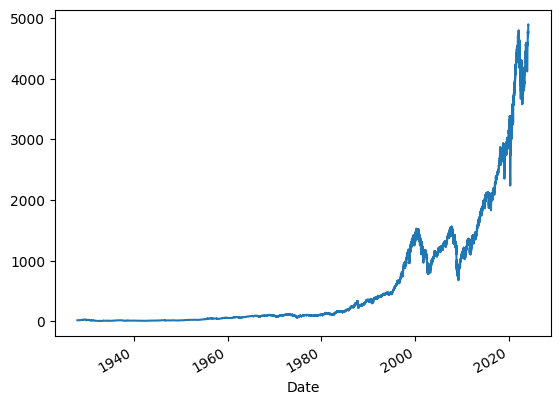

In [ ]:
sp['Adj Close'].plot()
plt.show()

In [ ]:
adf_test = sm.tsa.stattools.adfuller(sp[['Adj Close']])
print(f'p-value = {adf_test[1]}' )

p-value = 1.0


In [ ]:
sp['returns'] = sp['Adj Close'].pct_change()
sp

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268
...,...,...,...,...,...,...,...
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4850.430176,4297610000,0.002194
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,4864.600098,3912800000,0.002921
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000,0.000812


In [ ]:
sp.dropna(inplace = True)
sp

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0,-0.009060
...,...,...,...,...,...,...,...
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4850.430176,4297610000,0.002194
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,4864.600098,3912800000,0.002921
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000,0.000812


<Axes: xlabel='Date'>

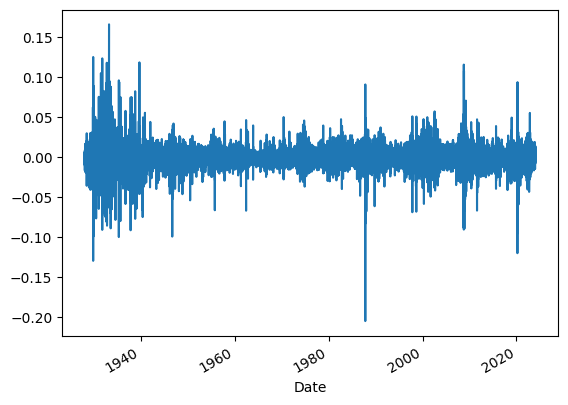

In [ ]:
sp['returns'].plot()

In [ ]:
print(f'Mean of Daily Returns = {sp.returns.mean().round(2)}' )

Mean of Daily Returns = 0.0


In [ ]:
model = arch.arch_model(sp['returns'], vol = 'GARCH', p = 1, q = 1, rescale = False)

results = model.fit(disp = 'off', show_warning = False)
residuals = results.resid
squared_residuals = residuals ** 2
arch_test = sm.stats.diagnostic.het_arch(squared_residuals)


print(f'ARCH test results:\n')
print(f'LM Statistic: {arch_test[0]}')
print(f'p-value: {arch_test[1]}')
print(f'F Statistic: {arch_test[2]}')
print(f'p-value: {arch_test[3]}')

ARCH test results:

LM Statistic: 158.86166613150615
p-value: 5.565650248579148e-29
F Statistic: 15.984190295655518
p-value: 4.432346476352426e-29


In [ ]:
model = arch.arch_model(sp['returns'],
                         vol = 'ARCH',
                         p = 1,
                         rescale = False)

results = model.fit(disp = 'off', show_warning = False)
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                75056.7
Distribution:                  Normal   AIC:                          -150107.
Method:            Maximum Likelihood   BIC:                          -150083.
                                        No. Observations:                24132
Date:                Sat, Jan 27 2024   Df Residuals:                    24131
Time:                        23:23:36   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.7160e-04  8.423e-05      6.786  1.150e-11 [4.

In [ ]:
model = arch.arch_model(sp['returns'],
                        vol = 'ARCH',
                        p = 2,
                        rescale = False)
results = model.fit(disp = 'off', show_warning = False)
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -34539.1
Distribution:                  Normal   AIC:                           69086.2
Method:            Maximum Likelihood   BIC:                           69118.6
                                        No. Observations:                24132
Date:                Sat, Jan 27 2024   Df Residuals:                    24131
Time:                        23:27:27   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0634  6.968e-03      9.103  8.799e-20 [4.

In [ ]:
sp['returns'] = sp['returns'] * 100
sp

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.566254
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.225230
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.959368
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.626784
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0,-0.906001
...,...,...,...,...,...,...,...
2024-01-22,4853.419922,4868.410156,4844.049805,4850.430176,4850.430176,4297610000,0.219433
2024-01-23,4856.799805,4866.479980,4844.370117,4864.600098,4864.600098,3912800000,0.292137
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000,0.081193


In [ ]:
model = arch.arch_model(sp['returns'],
                        vol = 'GARCH',
                        p = 1,
                        q = 1)

results = model.fit(disp = 'off', show_warning = False)
print(results
      )

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -31981.0
Distribution:                  Normal   AIC:                           63970.0
Method:            Maximum Likelihood   BIC:                           64002.3
                                        No. Observations:                24132
Date:                Sat, Jan 27 2024   Df Residuals:                    24131
Time:                        23:30:25   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0531  5.659e-03      9.388  6.093e-21 [4.